In [7]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import optimize as opt
from scipy import constants
from math import *

plt.rcParams.update({'font.size': 13})

xValues =[1,2,4,8,14,16,28,56]

twoD_Color_Runs = [[0.13165828881088867, 0.24482621011475003, 0.45896613288905413, 0.7446681758608364, 1.0435036679153926, 0.9955994504291034, 1.1103462059470144, 0.9018352347026198],
                    [0.13150350588346685, 0.24544876625177645, 0.45705301357904504, 0.8021561958544567, 1.0397063869163348, 1.0998438221772509, 1.0769247337303596, 0.860141063134354]]

twoD_Color_Average = []
for i in range(len(twoD_Color_Runs[0])): 
    twoD_Color_Average.append((twoD_Color_Runs[0][i] + twoD_Color_Runs[1][i])/2.)

print(twoD_Color_Average)

mmups = {"2DGreedy": [0.15342788582510447, 0.28684280727318623, 0.5233820950985266, 0.8823866794906865, 1.1547477453550272, 1.193702028099746, 0.9656051447442112, 0.7287779850746269],
        "2DColor": twoD_Color_Average}

speedUps = {}

#initialize speedup data
for k in mmups.keys():
    noOmpEntry = []
    for i in range(0, len(mmups[k])):
        noOmpEntry.append(mmups[k][i]/mmups[k][0])
        speedUps[k] = noOmpEntry

[0.13158089734717776, 0.24513748818326325, 0.45800957323404956, 0.7734121858576466, 1.0416050274158637, 1.0477216363031772, 1.093635469838687, 0.880988148918487]


In [8]:
def createGraph(xValues, firstSample, firstLabel : str, secondSample, secondLabel : str, x_label : str, y_label : str, filename : str, title:str):
    fig, ax = plt.subplots()

    ax.errorbar(
        xValues,
        firstSample,
        #yerr = ,
        marker = '.',
        color ='green',
        markerfacecolor = 'green',
        linestyle = '',
        elinewidth= 0.5,
        capsize = 1.5,
        label=firstLabel
    )

    ax.errorbar(
        xValues,
        secondSample,
        #yerr = ,
        marker = '.',
        color ='red',
        markerfacecolor = 'red',
        linestyle = '',
        elinewidth= 0.5,
        capsize = 1.5,
        label=secondLabel
    )

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    ax.legend()
    fig.savefig(filename + '.pdf')
    fig.savefig(filename+'.png')

def createBarGraph(xValues, sample : list, x_label:str, y_label:str, title:str, filename:str):
    fig, ax = plt.subplots()

    ax.bar(np.arange(len(xValues)), sample, align='center')
    ax.set_xticks(range(len(xValues)),xValues)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    # Striche auf x-Achse ausschalten
    ax.tick_params(
        axis='x',
        which='both', #major und minor ticks
        bottom=False  # ticks auf der x-Achse (unten)
    )

    ax.legend()
    fig.savefig(filename+'.pdf')
    fig.savefig(filename+'.png')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


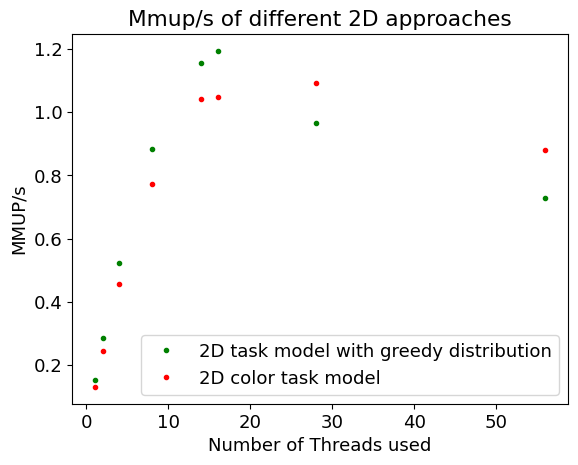

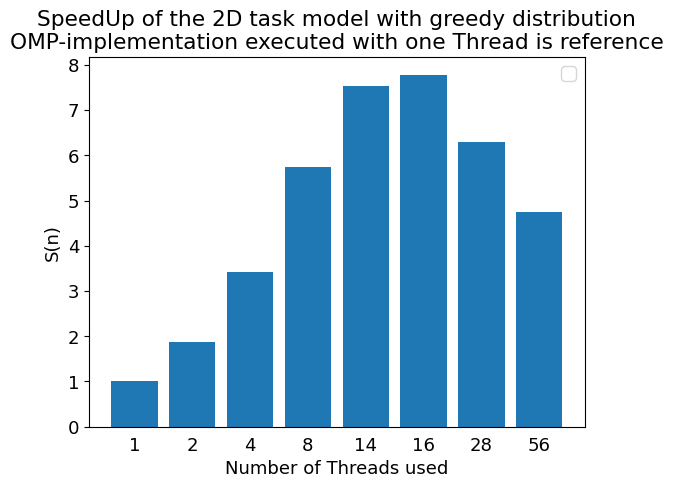

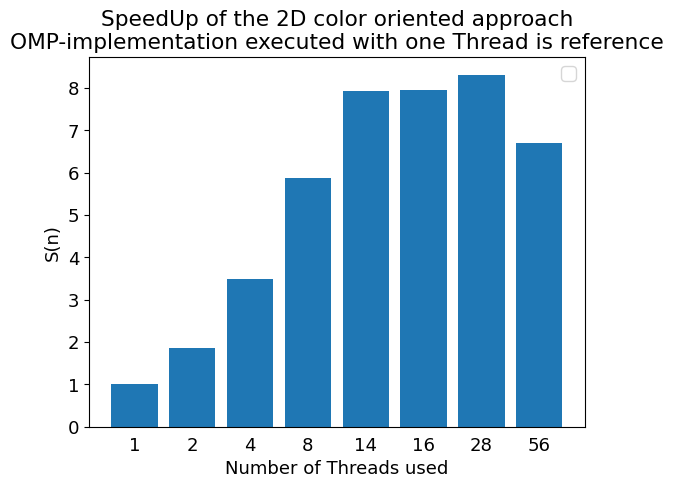

In [9]:
#def createGraph(xValues, firstSample : str, firstLabel : str, secondSample : str, secondLabel : str, x_label : str, y_label : str, filename : str):

createGraph(xValues=xValues, firstSample=mmups["2DGreedy"], firstLabel="2D task model with greedy distribution" , secondLabel="2D color task model", secondSample=mmups["2DColor"], x_label="Number of Threads used", y_label="MMUP/s", filename="clusterMmup2DComp", title="Mmup/s of different 2D approaches")
createBarGraph(xValues=xValues, sample=speedUps["2DGreedy"], x_label="Number of Threads used", y_label="S(n)", title="SpeedUp of the 2D task model with greedy distribution\nOMP-implementation executed with one Thread is reference",filename="cluster2DGreedyBarGraph")
createBarGraph(xValues=xValues, sample=speedUps["2DColor"], x_label="Number of Threads used", y_label="S(n)", title="SpeedUp of the 2D color oriented approach\nOMP-implementation executed with one Thread is reference",filename="cluster2DColorBarGraph")
